In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import collections
import networkx as nx
from Bio.Seq import Seq
from Bio import SeqIO

## Read in Sample MetaData

In [2]:
metaData = pd.read_csv('/home/mark/Desktop/HLA/Globus/hgsvc_samples.tsv', sep='\t')
metaData

order_num hgsvc_phase   sample   family    member population supergroup  \
0           1         Yr1  NA19238     Y117    Mother        YRI        AFR   
1           2         Yr1  NA19239     Y117    Father        YRI        YRI   
2           3         Yr1  NA19240     Y117  Daughter        YRI        AFR   
3           4         Yr1  HG00731     PR05    Father        PUR        AMR   
4           5         Yr1  HG00732     PR05    Mother        PUR        AMR   
..        ...         ...      ...      ...       ...        ...        ...   
64         65         Yr2  NA19384  NA19384         -        LWK        AFR   
65         66         Yr3  HG01890     BB05    Father        ACB        AFR   
66         67         Yr3  NA19705     2368       Son        ASW        AFR   
67         68         Yr3  HG03456     SL51       Son        MSL        AFR   
68         69         Yr3  HG00358  HG00358         -        FIN        EUR   

       sex  
0   Female  
1     Male  
2   Female  
3     Male  
4   Female  
..     ...  
64    Male  
65    Male  
66    Male  
67    Male  
68    Male  

[69 rows x 8 columns]

In [3]:
samplePopDict={}
for x,y in zip(metaData['sample'], metaData['supergroup']):
    samplePopDict[x]=y
samplePopDict

{'NA19238': 'AFR',
 'NA19239': 'YRI',
 'NA19240': 'AFR',
 'HG00731': 'AMR',
 'HG00732': 'AMR',
 'HG00733': 'AMR',
 'HG00512': 'EAS',
 'HG00513': 'EAS',
 'HG00514': 'EAS',
 'HG03732': 'SAS',
 'HG01573': 'AMR',
 'HG00171': 'EUR',
 'HG02587': 'AFR',
 'HG01114': 'AMR',
 'HG02018': 'EAS',
 'NA19036': 'AFR',
 'NA12329': 'EUR',
 'HG02011': 'AFR',
 'NA19983': 'AFR',
 'HG03371': 'AFR',
 'HG02492': 'SAS',
 'HG03009': 'SAS',
 'HG03683': 'SAS',
 'HG03065': 'AFR',
 'NA18534': 'EAS',
 'HG01505': 'EUR',
 'NA19650': 'AMR',
 'NA18939': 'EAS',
 'HG00864': 'EAS',
 'NA20847': 'SAS',
 'NA20509': 'EUR',
 'HG00096': 'EUR',
 'HG01596': 'EAS',
 'NA24385': 'EUR',
 'NA12878': 'EUR',
 'HG02818': 'AFR',
 'HG03125': 'AFR',
 'HG03486': 'AFR',
 'HG01352': 'AMR',
 'HG02059': 'EAS',
 'NA19434': 'AFR',
 'HG04217': 'SAS',
 'HG03807': 'SAS',
 'NA19836': 'AFR',
 'HG02106': 'AMR',
 'HG00268': 'EUR',
 'NA20355': 'AFR',
 'NA19320': 'AFR',
 'NA19129': 'AFR',
 'HG02769': 'AFR',
 'HG03452': 'AFR',
 'HG03520': 'AFR',
 'HG02282': 

In [4]:
color_codes = {
    'AMR': '#FF0000',  # Red
    'AFR': '#00FF00',  # Green
    'EUR': '#0000FF',  # Blue
    'EAS': '#FFFF00',  # Yellow
    'SAS': '#FF00FF',  # Magenta
    'YRI':'#FFA500' #orange
}

## Load in Data

In [5]:
c4DF = SeqIO.to_dict(SeqIO.parse("/home/mark/Desktop/HLA/C4_Master/Sample_Sequences_and_RepeatMasker/C4_Sequences.fasta", "fasta"))

In [6]:
c4DF

{'HG02059.hap2:3883032-3903656': SeqRecord(seq=Seq('AGAAGGTAGCAGACAGACAGACGGATCTAACCTCTCTTGGATCCTCCAGCCATG...GCA'), id='HG02059.hap2:3883032-3903656', name='HG02059.hap2:3883032-3903656', description='HG02059.hap2:3883032-3903656', dbxrefs=[]),
 'NA19239.hap2:3955290-3969546': SeqRecord(seq=Seq('AGAAGGTAGCAGACAGACAGACGGATCTAACCTCTCTTGGATCCTCCAGCCATG...GCA'), id='NA19239.hap2:3955290-3969546', name='NA19239.hap2:3955290-3969546', description='NA19239.hap2:3955290-3969546', dbxrefs=[]),
 'NA19240.hap1:3951602-3965858': SeqRecord(seq=Seq('AGAAGGTAGCAGACAGACAGACGGATCTAACCTCTCTTGGATCCTCCAGCCATG...GCA'), id='NA19240.hap1:3951602-3965858', name='NA19240.hap1:3951602-3965858', description='NA19240.hap1:3951602-3965858', dbxrefs=[]),
 'HG02818.hap1:3968141-3982397': SeqRecord(seq=Seq('AGAAGGTAGCAGACAGACAGACGGATCTAACCTCTCTTGGATCCTCCAGCCATG...GCA'), id='HG02818.hap1:3968141-3982397', name='HG02818.hap1:3968141-3982397', description='HG02818.hap1:3968141-3982397', dbxrefs=[]),
 'NA19317.hap1:38474

In [7]:
mynodelist = [x for x in c4DF.keys()]
len(mynodelist)

259

In [8]:
from scipy.spatial import distance
from tqdm import tqdm

def returnSimilarity(inputDictionary):
    
    similarityDict={}
    for key in inputDictionary.keys():
        similarityDict[key]={}
        for key2 in inputDictionary.keys():
            if key == key2:
                continue
            else:
    
                sequence1 = [x for x in str(inputDictionary[key].seq)]
                sequence2 = [y for y in str(inputDictionary[key2].seq)]

                similarityDict[key][key2]=1-distance.hamming(sequence1, sequence2)    
    return(similarityDict)

In [9]:
C4_Similarity = returnSimilarity(c4DF)

In [10]:
C4_Similarity

{'HG02059.hap2:3883032-3903656': {'NA19239.hap2:3955290-3969546': 0.9987101529390087,
  'NA19240.hap1:3951602-3965858': 0.9987101529390087,
  'HG02818.hap1:3968141-3982397': 0.9987101529390087,
  'NA19317.hap1:3847453-3861709': 0.9987101529390087,
  'HG03371.hap2:3893701-3907957': 0.9987101529390087,
  'NA12329.hap2:3880504-3901128': 0.9994472084024323,
  'HG04036.hap1:3812093-3832717': 0.9994472084024323,
  'HG04036.hap1:3844831-3865454': 0.9994472084024323,
  'HG01596.hap1:3855625-3876249': 0.9994472084024323,
  'HG02018.hap2:3888693-3909317': 0.9994472084024323,
  'HG02106.hap1:3872798-3893422': 0.9996314722682882,
  'HG02106.hap1:3905536-3926160': 0.9996314722682882,
  'HG04217.hap1:3808624-3829248': 0.9996314722682882,
  'HG00731.hap1:3839448-3860072': 0.9996314722682882,
  'NA18939.hap2:3816194-3836818': 0.9996314722682882,
  'NA19650.hap2:3888302-3908926': 0.9996314722682882,
  'HG03683.hap1:3851769-3872393': 0.9996314722682882,
  'HG03683.hap1:3884507-3905131': 0.99963147226828

## Find which are exactly the same

In [11]:
keyUsage={x:0 for x in C4_Similarity.keys()}
C4Groups={}
i=0
for key in C4_Similarity.keys():
    
    if keyUsage[key]==0:
        C4Groups[i]=[]
        C4Groups[i].append(key)
        keyUsage[key]=1
        
        for other in C4_Similarity[key]:
            
            if keyUsage[other]==0:
                if C4_Similarity[key][other] == 1.0:
                    C4Groups[i].append(other)
                    keyUsage[other]=1                    
                    
                else:
                    continue
                    
            else:
                continue
        i+=1
    else:
        continue

In [12]:
total=0
for group in C4Groups.keys():
    total+=len(C4Groups[group])
print(total)

259


In [13]:
groupKeyDict= {}
for group in C4Groups.keys():
    for item in C4Groups[group]:
         groupKeyDict[item]=group
groupKeyDict

{'HG02059.hap2:3883032-3903656': 0,
 'NA19239.hap2:3955290-3969546': 1,
 'NA19240.hap1:3951602-3965858': 1,
 'HG02818.hap1:3968141-3982397': 1,
 'NA19317.hap1:3847453-3861709': 2,
 'HG03371.hap2:3893701-3907957': 2,
 'NA12329.hap2:3880504-3901128': 3,
 'HG04036.hap1:3812093-3832717': 4,
 'HG04036.hap1:3844831-3865454': 5,
 'HG01596.hap1:3855625-3876249': 6,
 'HG02018.hap2:3888693-3909317': 7,
 'HG02106.hap1:3872798-3893422': 8,
 'HG02106.hap1:3905536-3926160': 8,
 'HG04217.hap1:3808624-3829248': 8,
 'HG00731.hap1:3839448-3860072': 8,
 'NA18939.hap2:3816194-3836818': 8,
 'NA19650.hap2:3888302-3908926': 8,
 'HG03683.hap1:3851769-3872393': 8,
 'HG03683.hap1:3884507-3905131': 8,
 'HG03009.hap2:3875279-3895903': 8,
 'HG01114.hap1:3816480-3837104': 8,
 'HG02059.hap1:3858260-3878884': 8,
 'NA18989.hap1:3962993-3983617': 8,
 'HG01352.hap1:3828679-3849303': 8,
 'HG01352.hap1:3861417-3882041': 8,
 'HG00733.hap2:3834236-3854860': 8,
 'HG02492.hap1:3873655-3894279': 8,
 'HG00171.hap2:3881740-39023

In [14]:
representatives = {x:{'Rep':str(C4Groups[x][0]), 'GroupSize':len(C4Groups[x]), 'Group':C4Groups[x], 'Edges':[], 'Heng':'temp'} for x in C4Groups.keys()}

In [15]:
representatives

{0: {'Rep': 'HG02059.hap2:3883032-3903656',
  'GroupSize': 1,
  'Group': ['HG02059.hap2:3883032-3903656'],
  'Edges': [],
  'Heng': 'temp'},
 1: {'Rep': 'NA19239.hap2:3955290-3969546',
  'GroupSize': 3,
  'Group': ['NA19239.hap2:3955290-3969546',
   'NA19240.hap1:3951602-3965858',
   'HG02818.hap1:3968141-3982397'],
  'Edges': [],
  'Heng': 'temp'},
 2: {'Rep': 'NA19317.hap1:3847453-3861709',
  'GroupSize': 2,
  'Group': ['NA19317.hap1:3847453-3861709', 'HG03371.hap2:3893701-3907957'],
  'Edges': [],
  'Heng': 'temp'},
 3: {'Rep': 'NA12329.hap2:3880504-3901128',
  'GroupSize': 1,
  'Group': ['NA12329.hap2:3880504-3901128'],
  'Edges': [],
  'Heng': 'temp'},
 4: {'Rep': 'HG04036.hap1:3812093-3832717',
  'GroupSize': 1,
  'Group': ['HG04036.hap1:3812093-3832717'],
  'Edges': [],
  'Heng': 'temp'},
 5: {'Rep': 'HG04036.hap1:3844831-3865454',
  'GroupSize': 1,
  'Group': ['HG04036.hap1:3844831-3865454'],
  'Edges': [],
  'Heng': 'temp'},
 6: {'Rep': 'HG01596.hap1:3855625-3876249',
  'Group

In [16]:
GroupPairingDict={}
for group in representatives.keys():
    GroupPairingDict[group]={'Value':0, 'Groups':[]}
    tempDict={}
    for comp,sim in C4_Similarity[representatives[group]['Rep']].items():
        if sim == 1.0:
            continue
        else:
            tempDict[comp]=sim
    maxvalue = max(tempDict.values())
    GroupPairingDict[group]['Value']=maxvalue
    mypairGroups=[]
    for c4gene,similarity in tempDict.items():
        if similarity ==maxvalue:
             mypairGroups.append(groupKeyDict[c4gene])
        else:
            continue
    
    for uniqueGene in set(mypairGroups):
        GroupPairingDict[group]['Groups'].append(uniqueGene)

In [17]:
GroupPairingDict

{0: {'Value': 0.9996314722682882, 'Groups': [8]},
 1: {'Value': 0.9996314722682882, 'Groups': [34]},
 2: {'Value': 0.9996314722682882, 'Groups': [9, 13]},
 3: {'Value': 0.9998157361341441, 'Groups': [8]},
 4: {'Value': 0.9998157361341441, 'Groups': [8]},
 5: {'Value': 0.9998157361341441, 'Groups': [8]},
 6: {'Value': 0.9998157361341441, 'Groups': [8]},
 7: {'Value': 0.9998157361341441, 'Groups': [8]},
 8: {'Value': 0.9998157361341441, 'Groups': [3, 4, 5, 6, 7, 20, 23]},
 9: {'Value': 0.9998157361341441, 'Groups': [10]},
 10: {'Value': 0.9998157361341441, 'Groups': [9, 13]},
 11: {'Value': 0.9998157361341441, 'Groups': [13]},
 12: {'Value': 0.9998157361341441, 'Groups': [13]},
 13: {'Value': 0.9998157361341441, 'Groups': [26, 10, 11, 12]},
 14: {'Value': 0.9998157361341441, 'Groups': [18]},
 15: {'Value': 0.9998157361341441, 'Groups': [18]},
 16: {'Value': 0.9998157361341441, 'Groups': [18]},
 17: {'Value': 0.9998157361341441, 'Groups': [18]},
 18: {'Value': 0.9998157361341441, 'Groups'

# Build a Network

In [23]:
c4annotation = pd.read_csv('/home/mark/Desktop/HLA/C4_Master/C4_annotations_final.csv').drop(columns=['Unnamed: 0']).set_index("LongName")
c4annotation

Haplotype   Gene_Name  Start_Coordinate  \
LongName                                                                   
HG00096.hap1:3830593-3851218  HG00096.hap1        C4AL           3830593   
HG00096.hap1:3854218-3857444  HG00096.hap1  CYP21A2_NF           3854218   
HG00096.hap1:3863332-3877589  HG00096.hap1        C4BS           3863332   
HG00096.hap1:3880586-3883813  HG00096.hap1     CYP21A2           3880586   
HG00096.hap2:3845753-3860009  HG00096.hap2        C4BS           3845753   
...                                    ...         ...               ...   
NA24385.hap1:3875119-3878346  NA24385.hap1     CYP21A2           3875119   
NA24385.hap2:3819422-3840046  NA24385.hap2        C4AL           3819422   
NA24385.hap2:3843046-3846269  NA24385.hap2  CYP21A2_NF           3843046   
NA24385.hap2:3852157-3872781  NA24385.hap2        C4BL           3852157   
NA24385.hap2:3875778-3879002  NA24385.hap2     CYP21A2           3875778   

                              End_Coordinate  
LongName                                      
HG00096.hap1:3830593-3851218         3851218  
HG00096.hap1:3854218-3857444         3857444  
HG00096.hap1:3863332-3877589         3877589  
HG00096.hap1:3880586-3883813         3883813  
HG00096.hap2:3845753-3860009         3860009  
...                                      ...  
NA24385.hap1:3875119-3878346         3878346  
NA24385.hap2:3819422-3840046         3840046  
NA24385.hap2:3843046-3846269         3846269  
NA24385.hap2:3852157-3872781         3872781  
NA24385.hap2:3875778-3879002         3879002  

[516 rows x 4 columns]

In [21]:
color_codes = {
    "LTR14": "red",
    "HERVKC4-int":'red',
    "C4AL": "blue",
    "C4AS": "lightblue",
    "C4BL": "green",
    "C4BS": "lightgreen",
    'Empty':'grey',
    'Orangutan':'orange',
    'Gorilla':'magenta',
    'Chimpanzee':'Yellow',
    'Siamang':'lime',
    'Bonobo':'brown'
}

In [22]:
representatives

{0: {'Rep': 'HG02059.hap2:3883032-3903656',
  'GroupSize': 1,
  'Group': ['HG02059.hap2:3883032-3903656'],
  'Edges': [],
  'Heng': 'temp'},
 1: {'Rep': 'NA19239.hap2:3955290-3969546',
  'GroupSize': 3,
  'Group': ['NA19239.hap2:3955290-3969546',
   'NA19240.hap1:3951602-3965858',
   'HG02818.hap1:3968141-3982397'],
  'Edges': [],
  'Heng': 'temp'},
 2: {'Rep': 'NA19317.hap1:3847453-3861709',
  'GroupSize': 2,
  'Group': ['NA19317.hap1:3847453-3861709', 'HG03371.hap2:3893701-3907957'],
  'Edges': [],
  'Heng': 'temp'},
 3: {'Rep': 'NA12329.hap2:3880504-3901128',
  'GroupSize': 1,
  'Group': ['NA12329.hap2:3880504-3901128'],
  'Edges': [],
  'Heng': 'temp'},
 4: {'Rep': 'HG04036.hap1:3812093-3832717',
  'GroupSize': 1,
  'Group': ['HG04036.hap1:3812093-3832717'],
  'Edges': [],
  'Heng': 'temp'},
 5: {'Rep': 'HG04036.hap1:3844831-3865454',
  'GroupSize': 1,
  'Group': ['HG04036.hap1:3844831-3865454'],
  'Edges': [],
  'Heng': 'temp'},
 6: {'Rep': 'HG01596.hap1:3855625-3876249',
  'Group

In [25]:
c4geneColor ={}
for group in representatives.keys():
    name = c4annotation.at[representatives[group]['Rep'],'Gene_Name']
    c4geneColor[representatives[group]['Rep']]=color_codes[name]

In [26]:
c4geneColor

{'HG02059.hap2:3883032-3903656': 'green',
 'NA19239.hap2:3955290-3969546': 'lightgreen',
 'NA19317.hap1:3847453-3861709': 'lightgreen',
 'NA12329.hap2:3880504-3901128': 'green',
 'HG04036.hap1:3812093-3832717': 'green',
 'HG04036.hap1:3844831-3865454': 'green',
 'HG01596.hap1:3855625-3876249': 'green',
 'HG02018.hap2:3888693-3909317': 'green',
 'HG02106.hap1:3872798-3893422': 'green',
 'NA19036.hap2:3907055-3921311': 'lightgreen',
 'HG02953.hap2:3891253-3905509': 'lightgreen',
 'HG03248.hap1:3984100-3998357': 'lightgreen',
 'HG03456.hap2:3935265-3949521': 'lightgreen',
 'HG01573.hap2:3889045-3903301': 'lightgreen',
 'HG03009.hap1:3827250-3841506': 'lightgreen',
 'NA20509.hap2:3938718-3952974': 'lightgreen',
 'NA19239.hap1:3891711-3905967': 'lightgreen',
 'HG03065.hap2:3960056-3974312': 'lightgreen',
 'NA19434.hap1:3914107-3928363': 'lightgreen',
 'NA20847.hap2:3888747-3909371': 'green',
 'HG01457.hap2:3859348-3879972': 'green',
 'NA19650.hap1:3699087-3719711': 'green',
 'HG01596.hap2:3

In [27]:
G = nx.Graph()
G.add_nodes_from([x for x in representatives.keys()])

In [28]:
for group in GroupPairingDict.keys():
    for match in GroupPairingDict[group]['Groups']:
        G.add_edge(group, match)

In [29]:
node_sizes=[int(representatives[x]['GroupSize'])*10 for x in G.nodes()]

In [30]:
representatives

{0: {'Rep': 'HG02059.hap2:3883032-3903656',
  'GroupSize': 1,
  'Group': ['HG02059.hap2:3883032-3903656'],
  'Edges': [],
  'Heng': 'temp'},
 1: {'Rep': 'NA19239.hap2:3955290-3969546',
  'GroupSize': 3,
  'Group': ['NA19239.hap2:3955290-3969546',
   'NA19240.hap1:3951602-3965858',
   'HG02818.hap1:3968141-3982397'],
  'Edges': [],
  'Heng': 'temp'},
 2: {'Rep': 'NA19317.hap1:3847453-3861709',
  'GroupSize': 2,
  'Group': ['NA19317.hap1:3847453-3861709', 'HG03371.hap2:3893701-3907957'],
  'Edges': [],
  'Heng': 'temp'},
 3: {'Rep': 'NA12329.hap2:3880504-3901128',
  'GroupSize': 1,
  'Group': ['NA12329.hap2:3880504-3901128'],
  'Edges': [],
  'Heng': 'temp'},
 4: {'Rep': 'HG04036.hap1:3812093-3832717',
  'GroupSize': 1,
  'Group': ['HG04036.hap1:3812093-3832717'],
  'Edges': [],
  'Heng': 'temp'},
 5: {'Rep': 'HG04036.hap1:3844831-3865454',
  'GroupSize': 1,
  'Group': ['HG04036.hap1:3844831-3865454'],
  'Edges': [],
  'Heng': 'temp'},
 6: {'Rep': 'HG01596.hap1:3855625-3876249',
  'Group

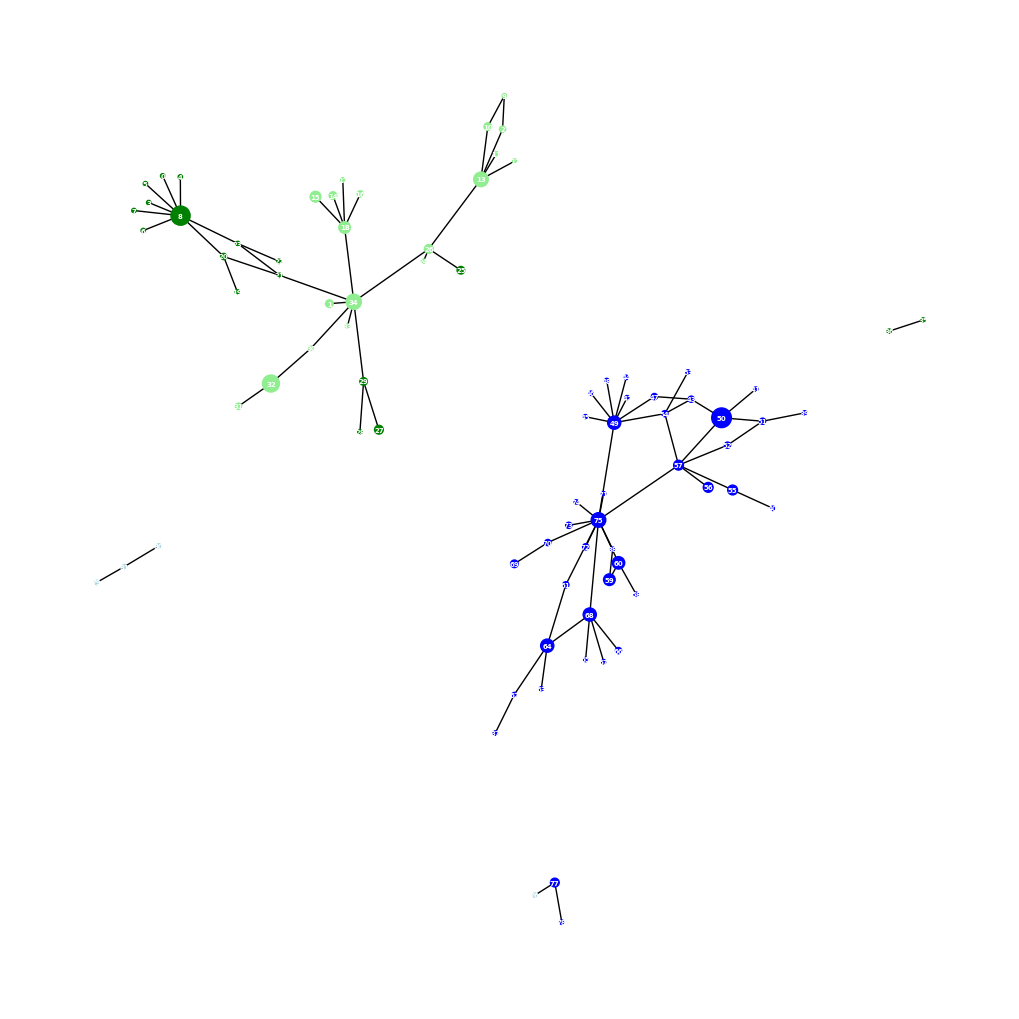

In [35]:
%matplotlib inline
from matplotlib import rcParams

import pandas as pd
import matplotlib.pyplot as plt
rcParams['figure.figsize'] = 10,10
colormap=[]
for node in G:
    colormap.append(c4geneColor[representatives[node]['Rep']])
nx.draw(G, node_color=colormap,with_labels=True, font_size=5, font_color="white", font_weight="bold",node_size=node_sizes)
plt.savefig("/home/mark/Desktop/HLA/C4_Master/Figures/c4_nucleotide_network.jpg", dpi=300, bbox_inches='tight')
plt.savefig("/home/mark/Desktop/HLA/C4_Master/Figures/c4_nucleotide_network.pdf", dpi=300, bbox_inches='tight')

In [36]:
from networkx.algorithms import community
import networkx.algorithms.community as nx_comm

leader = 0.0
num=0
for seednum in range(100000):
    lapCom = community.asyn_lpa_communities(G, seed=seednum)
    modularity = nx_comm.modularity(G, lapCom)
    if float(modularity)> leader:
        num=seednum
        leader = modularity
    else:
        continue
print(num)
print(leader)

93802
0.7429757785467129


In [37]:
from networkx.algorithms import community

lapCom = community.asyn_lpa_communities(G, seed=93802)

In [38]:
Groupnum=1
networkCommunities={}
for group in lapCom:
    networkCommunities[Groupnum]=[]
    for member in group:
        networkCommunities[Groupnum].append(member)
    Groupnum+=1

## Export Some Sequences

In [39]:
import json

In [40]:
with open('/home/mark/Desktop/HLA/C4_Master/C4_Nucleotide_Network_Data/C4_Nucleotide_NetworkCommunities.json', 'w') as fp:
    json.dump(networkCommunities, fp)

In [41]:
networkCommunities

{1: [0, 3, 4, 5, 6, 7, 8, 19, 20, 21, 22, 23],
 2: [1, 33, 34, 14, 15, 16, 17, 18],
 3: [2, 9, 10, 11, 12, 13, 24, 25, 26],
 4: [27, 28, 29],
 5: [32, 30, 31],
 6: [35, 36],
 7: [64, 37, 61, 62, 63],
 8: [38, 71, 72, 73, 74, 75, 58, 59, 60],
 9: [39, 41, 43, 50, 51, 52, 53, 54, 56, 57],
 10: [40, 55],
 11: [42, 44, 45, 46, 47, 48, 49],
 12: [65, 66, 67, 68],
 13: [69, 70],
 14: [76, 77, 78],
 15: [80, 81, 79]}

In [43]:
for community in networkCommunities.keys():
    for member in networkCommunities[community]:
        
        #with open('/home/mark/Desktop/HLA/C4_Master/C4_Nucleotide_Network_Data/C4_nucleotide_NetworkCommunities_sequences.fasta', 'a+') as file:
        #    if 'C4' in str(representatives[member]['Rep']):
        #        file.write(">Community_"+str(community)+"-NodeGroup_"+str(member)+"-Members_"+str(representatives[member]['GroupSize'])+"_"+str(representatives[member]['HengAnnotation'])+"\n")
        #        file.write(str(c4DF[representatives[member]['Rep']].seq)+"\n")
        #    else:
        #        file.write(">Community_"+str(community)+"-NodeGroup_"+str(member)+"-Members_"+str(representatives[member]['GroupSize'])+"_"+str(representatives[member]['Rep'])+"\n")
        #        file.write(str(c4DF[representatives[member]['Rep']].seq)+"\n")
        #file.close()

# Read the Data Back in and Find Which Columns have variants

In [55]:
c4networks = SeqIO.to_dict(SeqIO.parse("/home/mark/Desktop/HLA/C4_Master/C4_Nucleotide_Network_Data/C4_nucleotide_NetworkCommunities_sequences.fasta", "fasta"))

In [56]:
c4networks

{'Community_1-NodeGroup_0-Members_1_HG02059.hap2:3883032-3903656': SeqRecord(seq=Seq('AGAAGGTAGCAGACAGACAGACGGATCTAACCTCTCTTGGATCCTCCAGCCATG...GCA'), id='Community_1-NodeGroup_0-Members_1_HG02059.hap2:3883032-3903656', name='Community_1-NodeGroup_0-Members_1_HG02059.hap2:3883032-3903656', description='Community_1-NodeGroup_0-Members_1_HG02059.hap2:3883032-3903656', dbxrefs=[]),
 'Community_1-NodeGroup_3-Members_1_NA12329.hap2:3880504-3901128': SeqRecord(seq=Seq('AGAAGGTAGCAGACAGACAGACGGATCTAACCTCTCTTGGATCCTCCAGCCATG...GCA'), id='Community_1-NodeGroup_3-Members_1_NA12329.hap2:3880504-3901128', name='Community_1-NodeGroup_3-Members_1_NA12329.hap2:3880504-3901128', description='Community_1-NodeGroup_3-Members_1_NA12329.hap2:3880504-3901128', dbxrefs=[]),
 'Community_1-NodeGroup_4-Members_1_HG04036.hap1:3812093-3832717': SeqRecord(seq=Seq('AGAAGGTAGCAGACAGACAGACGGATCTAACCTCTCTTGGATCCTCCAGCCATG...GCA'), id='Community_1-NodeGroup_4-Members_1_HG04036.hap1:3812093-3832717', name='Community_1-N

In [57]:
newSeqs = []
for key in c4networks.keys():
    
    tempList=[key]
    for n in str(c4networks[key].seq):
        tempList.append(n)
    newSeqs.append(tempList)

In [59]:
columns=['ID']
for x in range(5427):
    columns.append(x)

In [60]:
newSeqDF = pd.DataFrame(data=newSeqs, columns=columns).set_index("ID")

In [61]:
newSeqDF.columns +=1

In [62]:
import collections
keepColumns=[]
keepAllColumns=[]
for column in newSeqDF.columns:
    
    tempCount = collections.Counter(newSeqDF[column])
    if len(tempCount.keys())>1:
        flag=0
        for key in tempCount.keys():
            if tempCount[key] == 1:
                flag+=1
            else:
                continue
                
        if flag==0:
            keepColumns.append(column)
            keepAllColumns.append(column)
        else:
            keepAllColumns.append(column)
    else:
        continue

In [63]:
nonsingletonDF = newSeqDF[keepColumns].copy()

In [64]:
nonsingletonDF

472  486  1068 1091 1329  \
ID                                                                            
Community_1-NodeGroup_0-Members_1_HG02059.hap2:...    C    A    C    A    C   
Community_1-NodeGroup_3-Members_1_NA12329.hap2:...    C    G    C    A    C   
Community_1-NodeGroup_4-Members_1_HG04036.hap1:...    C    G    C    A    C   
Community_1-NodeGroup_5-Members_1_HG04036.hap1:...    C    G    C    A    C   
Community_1-NodeGroup_6-Members_1_HG01596.hap1:...    C    G    C    A    C   
...                                                 ...  ...  ...  ...  ...   
Community_14-NodeGroup_77-Members_4_NA19239.hap...    C    G    C    C    C   
Community_14-NodeGroup_78-Members_1_HG02554.hap...    C    G    C    C    C   
Community_15-NodeGroup_80-Members_1_HG03456.hap...    C    G    T    C    C   
Community_15-NodeGroup_81-Members_1_HG02554.hap...    C    G    T    C    C   
Community_15-NodeGroup_79-Members_1_HG03065.hap...    C    G    T    C    C   

                                                   1484 1536 1697 2091 2526  \
ID                                                                            
Community_1-NodeGroup_0-Members_1_HG02059.hap2:...    C    C    A    C    C   
Community_1-NodeGroup_3-Members_1_NA12329.hap2:...    C    C    A    C    C   
Community_1-NodeGroup_4-Members_1_HG04036.hap1:...    C    C    A    C    C   
Community_1-NodeGroup_5-Members_1_HG04036.hap1:...    C    C    A    C    C   
Community_1-NodeGroup_6-Members_1_HG01596.hap1:...    C    C    A    C    C   
...                                                 ...  ...  ...  ...  ...   
Community_14-NodeGroup_77-Members_4_NA19239.hap...    C    C    A    C    C   
Community_14-NodeGroup_78-Members_1_HG02554.hap...    C    C    A    C    C   
Community_15-NodeGroup_80-Members_1_HG03456.hap...    C    C    A    C    C   
Community_15-NodeGroup_81-Members_1_HG02554.hap...    C    C    A    C    C   
Community_15-NodeGroup_79-Members_1_HG03065.hap...    C    C    A    C    C   

                                                    ... 3671 3680 3681 3786  \
ID                                                  ...                       
Community_1-NodeGroup_0-Members_1_HG02059.hap2:...  ...    C    G    G    A   
Community_1-NodeGroup_3-Members_1_NA12329.hap2:...  ...    C    G    G    A   
Community_1-NodeGroup_4-Members_1_HG04036.hap1:...  ...    C    G    G    A   
Community_1-NodeGroup_5-Members_1_HG04036.hap1:...  ...    C    G    G    A   
Community_1-NodeGroup_6-Members_1_HG01596.hap1:...  ...    C    G    G    A   
...                                                 ...  ...  ...  ...  ...   
Community_14-NodeGroup_77-Members_4_NA19239.hap...  ...    C    G    G    G   
Community_14-NodeGroup_78-Members_1_HG02554.hap...  ...    C    G    G    G   
Community_15-NodeGroup_80-Members_1_HG03456.hap...  ...    C    G    G    G   
Community_15-NodeGroup_81-Members_1_HG02554.hap...  ...    C    G    G    G   
Community_15-NodeGroup_79-Members_1_HG03065.hap...  ...    C    G    G    G   

                                                   3907 4288 4320 4639 5115  \
ID                                                                            
Community_1-NodeGroup_0-Members_1_HG02059.hap2:...    G    G    T    C    A   
Community_1-NodeGroup_3-Members_1_NA12329.hap2:...    G    G    T    C    A   
Community_1-NodeGroup_4-Members_1_HG04036.hap1:...    G    G    T    C    A   
Community_1-NodeGroup_5-Members_1_HG04036.hap1:...    G    G    T    C    A   
Community_1-NodeGroup_6-Members_1_HG01596.hap1:...    G    G    T    C    A   
...                                                 ...  ...  ...  ...  ...   
Community_14-NodeGroup_77-Members_4_NA19239.hap...    G    G    T    C    G   
Community_14-NodeGroup_78-Members_1_HG02554.hap...    G    G    T    T    G   
Community_15-NodeGroup_80-Members_1_HG03456.hap...    G    C    T    C    G   
Community_15-NodeGroup_81-Members_1_HG02554.hap...    G    C    T    C    G   
Community_15-NodeGr

In [65]:
with open('/home/mark/Desktop/HLA/C4_Master/C4_Nucleotide_Network_Data/c4_nucleotide_SharedVariants.fasta', 'a+') as file:
    for line in nonsingletonDF.index:
        file.write(">"+str(line)+"\n")
        file.write(''.join(nonsingletonDF.loc[line])+"\n")
file.close()        

In [66]:
keepColumns

[472,
 486,
 1068,
 1091,
 1329,
 1484,
 1536,
 1697,
 2091,
 2526,
 2770,
 3269,
 3336,
 3410,
 3413,
 3421,
 3424,
 3426,
 3578,
 3666,
 3671,
 3680,
 3681,
 3786,
 3907,
 4288,
 4320,
 4639,
 5115,
 5306]